# ANALIZA WIELOWYMIAROWA

### Celem tej pracy jest ocena czynnikow mogących wpływać na poczucie szczęścia w danym kraju.
### W tym celu przeporwadze 3 analizy
- Analize skupień
- Analize PCA
- Porządkowanie liniowe

### Dane które mi do tego posłużą zawieraja poniższe informacje.

- Adjusted net national income per capita (current US$)
- Adjusted savings: gross savings (% of GNI)
- Age dependency ratio (% of working-age population)
- Birth rate, crude (per 1,000 people)
- Consumer price index (2010 = 100)
- Death rate, crude (per 1,000 people)
- Employers, total (% of total employment) (modeled ILO estimate)
- Forest area (% of land area)
- GDP (current US$)
- GDP growth (annual %)
- GDP per capita (current US$)',
- GDP per capita, PPP (current international $)
- Individuals using the Internet (% of population)
- Inflation, consumer prices (annual %)
- Land area (sq. km)
- Life expectancy at birth, total (years)
- Population growth (annual %)
- Self-employed, total (% of total employment) (modeled ILO estimate)
- Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)
- Unemployment, total (% of total labor force) (national estimate)
- Urban population (% of total population)


### Lista krajów: Albania, Austria, Belarus, Belgium, Bulgaria, Czech Republic, Croatia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Latvia, Lithuania, Luxembourg, Norway, Poland, Slovenia, Slovak Republic, Switzerland, Ukraine, United Kingdom




<p style='font-size:15px'>Wszytkie dane użyte w analizach pochodzą z https://databank.worldbank.org/source/world-development-indicators </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

import warnings

warnings.simplefilter("ignore")
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv('data.csv')

In [3]:
# data cleaning, removing nans, reshaping the table etc

data.columns = ['country_name', 'country_code', 'features', 'unk', 'values']
data = data[['country_code', 'features', 'values']]
data['values'] = data['values'].map(lambda x: float(x) if x != '..' else np.nan)
data = data.dropna()
data = data.pivot_table(index='country_code', columns=['features'],values=['values'])
data = data.dropna(axis=1)

data.columns = data.columns.droplevel(0)
data.columns.name = None
df = data     

In [4]:
df.head()

,Access to electricity (% of population),Adjusted net national income per capita (current US$),Adjusted savings: gross savings (% of GNI),Age dependency ratio (% of working-age population),"Birth rate, crude (per 1,000 people)",Consumer price index (2010 = 100),"Death rate, crude (per 1,000 people)","Employers, total (% of total employment) (modeled ILO estimate)",Forest area (% of land area),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"GDP per capita, PPP (current international $)",Individuals using the Internet (% of population),"Inflation, consumer prices (annual %)",Land area (sq. km),"Life expectancy at birth, total (years)",Population growth (annual %),"Self-employed, total (% of total employment) (modeled ILO estimate)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population)
country_code,,,,,,,,,,,,,,,,,,,,,,,
ALB,100.0,4326.330596,16.830870,45.810037,11.78,117.392740,7.898,3.29,28.791971,1.514702e+10,4.071301,5284.380184,13546.481686,65.400000,2.028060,27400.0,78.458000,-0.246732,55.48,7.17,12.30,12.30,60.319
AUT,100.0,41712.201266,27.118865,49.923940,9.70,116.277887,9.500,4.57,47.163960,4.548726e+11,2.580121,51453.147024,57050.351355,87.479137,1.998380,82520.0,81.692683,0.487072,12.01,11.96,4.85,4.85,58.297
BEL,100.0,39098.085540,24.520778,55.870466,10.40,115.451626,9.700,3.79,22.764201,5.434107e+11,1.787920,47554.746308,52668.172441,88.647343,2.053165,30280.0,81.595122,0.455185,14.03,11.08,5.95,5.95,98.001
BGR,100.0,7747.240112,24.649621,55.321416,8.90,110.974059,15.400,3.72,35.620855,6.623016e+10,3.092448,9427.730430,22911.298354,64.782011,2.814545,108560.0,74.963415,-0.722080,11.65,12.65,5.21,5.21,75.008
BLR,100.0,4975.785814,30.281572,46.436664,9.90,481.390314,12.700,0.89,43.051532,6.003126e+10,3.149198,6330.075246,19338.666438,79.129887,4.872302,202980.0,74.175610,-0.155570,4.18,11.45,4.76,4.76,78.595


In [5]:
df.columns

Index(['Access to electricity (% of population)',
       'Adjusted net national income per capita (current US$)',
       'Adjusted savings: gross savings (% of GNI)',
       'Age dependency ratio (% of working-age population)',
       'Birth rate, crude (per 1,000 people)',
       'Consumer price index (2010 = 100)',
       'Death rate, crude (per 1,000 people)',
       'Employers, total (% of total employment) (modeled ILO estimate)',
       'Forest area (% of land area)', 'GDP (current US$)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'GDP per capita, PPP (current international $)',
       'Individuals using the Internet (% of population)',
       'Inflation, consumer prices (annual %)', 'Land area (sq. km)',
       'Life expectancy at birth, total (years)',
       'Population growth (annual %)',
       'Self-employed, total (% of total employment) (modeled ILO estimate)',
       'Total alcohol consumption per capita (liters of pure alcohol, projected esti

In [6]:
# raname the columns to more friendly format
df.columns = [
    'electricity_access',
    'adj_income_per_cap',
    'adj_savings',
    'age_dependency_ratio',
    'birth_rate_per_1000',
    'consumer_price_index',
    'death_rate_per_1000',
    'employers_ratio_to_employment',
    'forest_area_in_percent',
    'gpd',
    'gpd_growth_in_usd',
    'gpd_per_capita',
    'gpd_per_capita_ppp',
    'percentage_using_internet',
    'inflation',
    'land_area_squared_km',
    'life_expectency',
    'population_growth',
    'self_employment_ratio',
    'alcohol_consumption',
    'unemployment_1',
    'unemployment_2',
    'urban_population_percentage'
]

cols_to_use = ['adj_income_per_cap', 'age_dependency_ratio', 'birth_rate_per_1000', 'consumer_price_index', 'forest_area_in_percent', 'inflation', 'life_expectency' , 'alcohol_consumption', 'unemployment_1', 'gpd_growth_in_usd', 'gpd_per_capita_ppp', 'population_growth', 'urban_population_percentage']

df = df[cols_to_use]

## Poniżej znajduje sie tabela z podstawownymi statystykami opisującymi cechy

In [7]:
df.describe()

,adj_income_per_cap,age_dependency_ratio,birth_rate_per_1000,consumer_price_index,forest_area_in_percent,inflation,life_expectency,alcohol_consumption,unemployment_1,gpd_growth_in_usd,gpd_per_capita_ppp,population_growth,urban_population_percentage
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,29026.687219,52.826809,10.062222,131.680093,33.555086,2.366278,79.526168,11.009630,6.370741,3.182162,44820.656085,0.238527,73.429741
std,19577.793312,4.587191,1.179861,75.694065,15.935943,1.955062,3.307580,1.904069,3.501665,1.769597,22420.817780,0.802098,12.080767
min,2782.196609,42.983574,7.300000,99.186961,0.496281,0.488370,71.582683,7.170000,2.240000,0.941737,12634.235554,-0.954190,53.726000
25%,13487.117994,50.188600,9.450000,109.734264,25.778086,1.514160,77.434146,9.705000,4.355000,1.826493,31178.480564,-0.196472,65.424500
50%,20805.995213,53.745318,10.200000,113.115843,32.683611,2.028060,80.953659,11.450000,5.370000,3.110836,41127.254047,0.274452,73.792000
75%,41297.296766,56.040042,10.650000,117.485902,38.279107,2.690423,82.021951,12.490000,7.385000,4.047806,56002.599052,0.491455,81.346000
max,65957.408917,61.267145,12.500000,481.390314,73.733219,10.951856,83.753659,14.450000,19.290000,9.030161,116644.848056,2.678143,98.001000


## Macież korelacji

<AxesSubplot:>

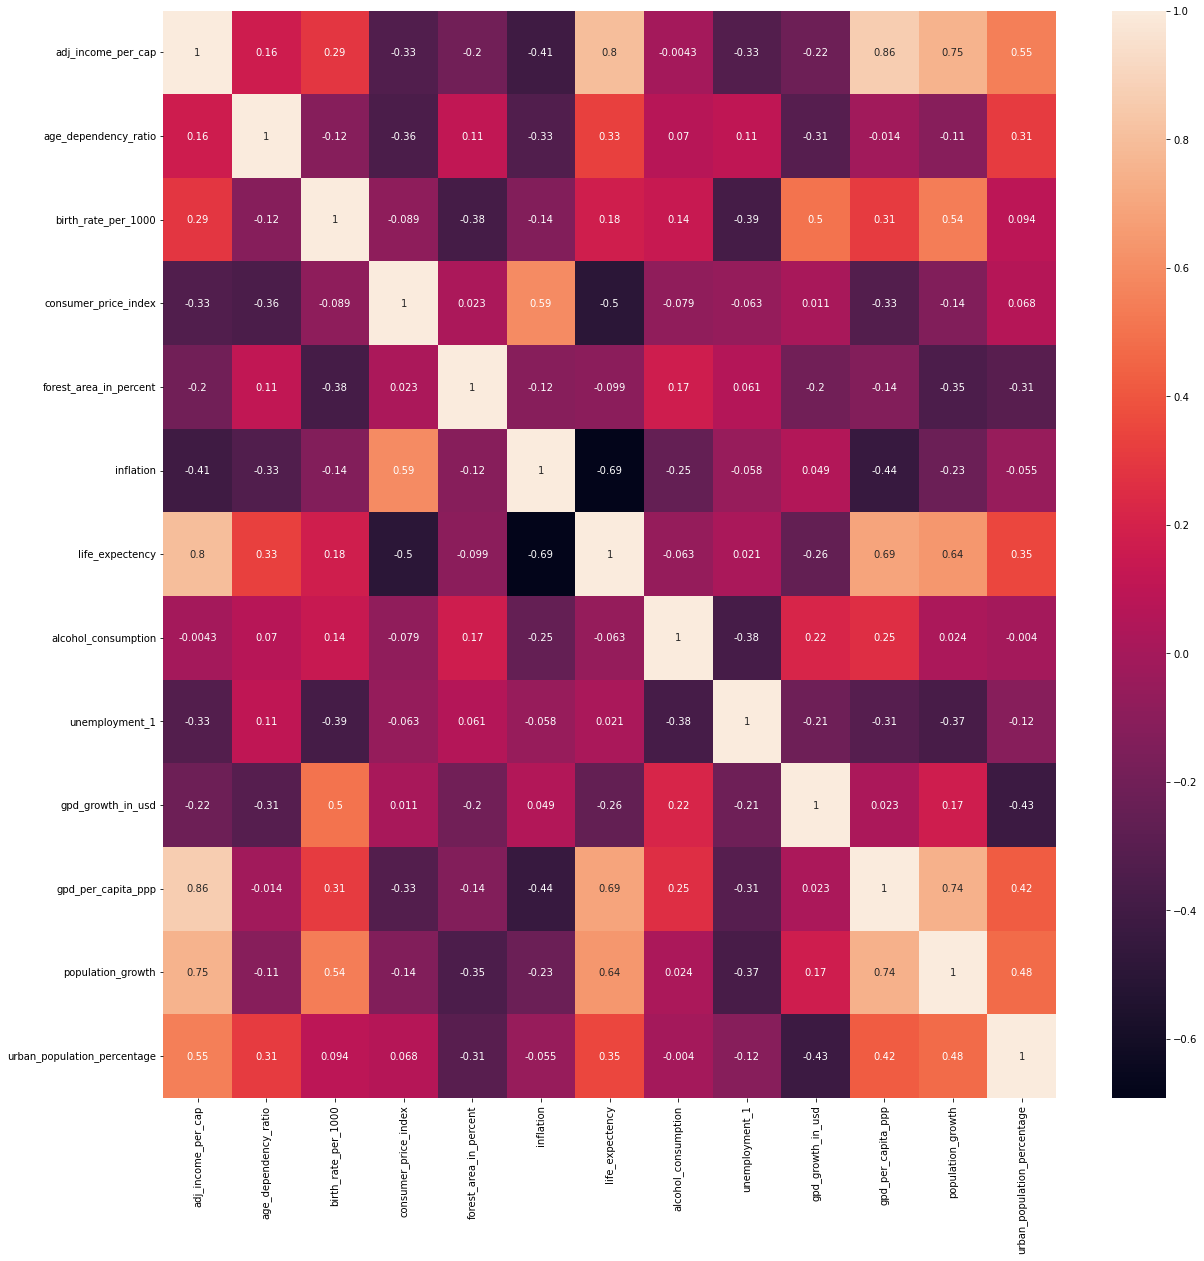

In [8]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True)

# PCA

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df)

pca = PCA()
transformed = pca.fit_transform(df_scaled)

0     0.335402
1     0.518771
2     0.651569
3     0.750969
4     0.824823
5     0.871265
6     0.912097
7     0.940738
8     0.963972
9     0.980194
10    0.994138
11    0.997860
12    1.000000
dtype: float64

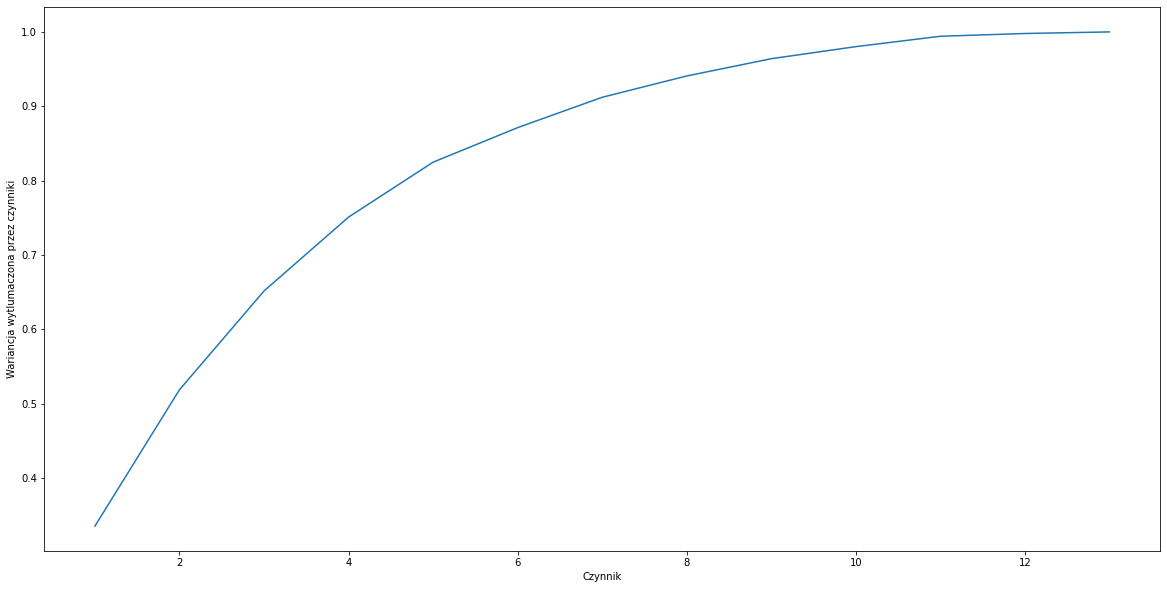

In [10]:
plt.figure(figsize=(20,10))
plt.plot(range(1,14), pd.Series(pca.explained_variance_ratio_).cumsum())
plt.xlabel('Czynnik')
plt.ylabel('Wariancja wytlumaczona przez czynniki')
pd.Series(pca.explained_variance_ratio_).cumsum()

## Na podstawie powyższych danych widzimy że 2 pierwsze składowe wyjaśnaiają 51% zmienności wszystkich cech

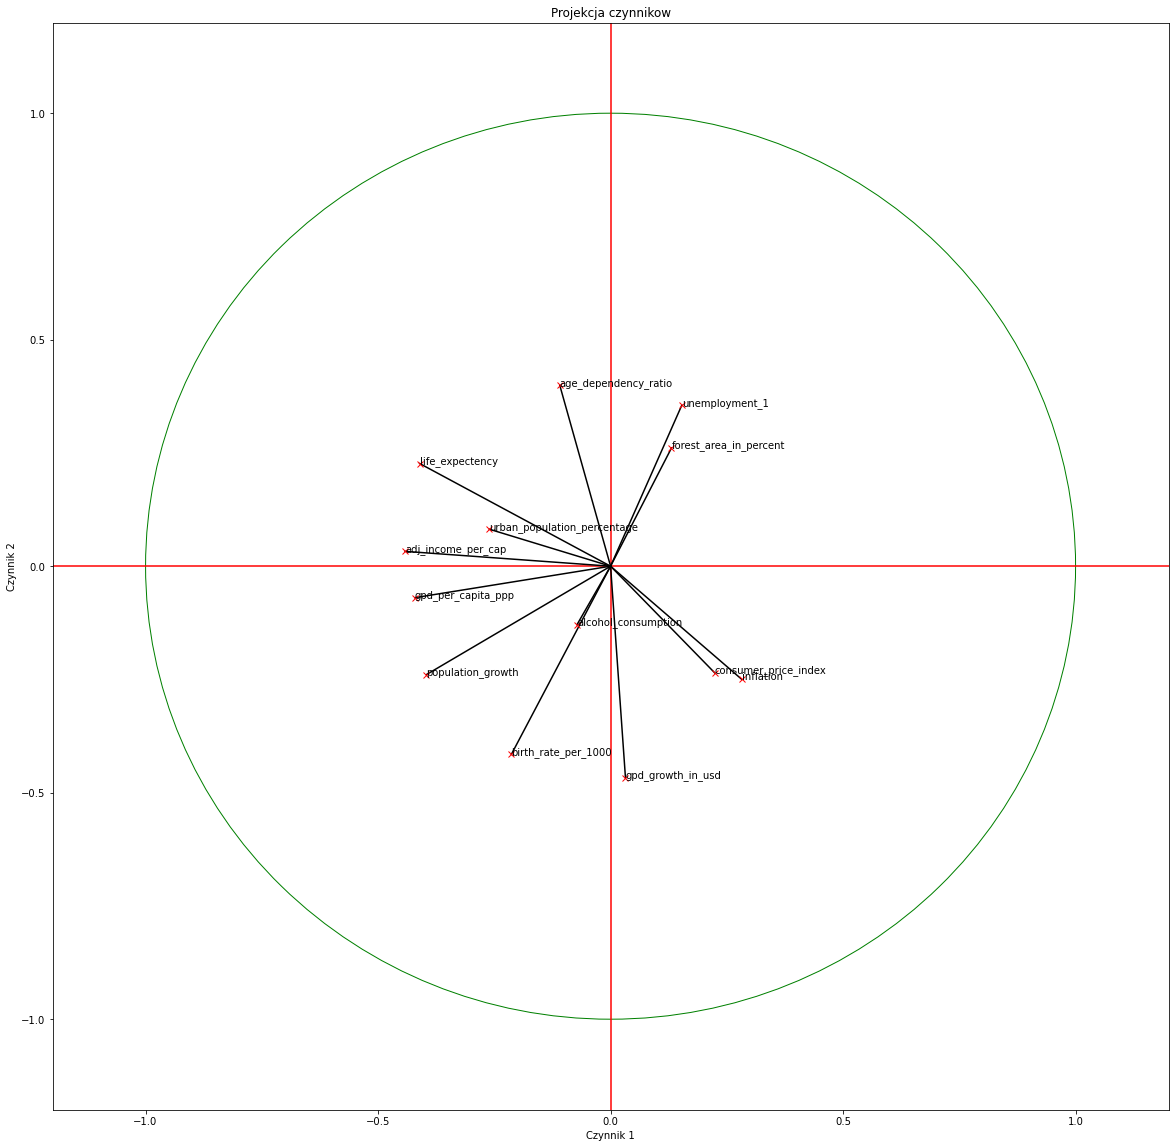

In [11]:
def circleOfCorrelations(pc_infos, labels):
	plt.figure(figsize=(20,20))
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)

	plt.plot([0.0,1.2],[0.0,0],'r')
	plt.plot([0.0,-1.2],[0.0,0],'r')
	plt.plot([0.0,0],[0.0,1.2],'r')
	plt.plot([0.0,0],[0.0,-1.2],'r')
	for idx, idx2 in enumerate(pc_infos["PC-0"]):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(labels[idx], xy=(x,y))
	plt.xlabel("Czynnik 1")
	plt.ylabel("Czynnik 2")
	plt.xlim((-1.2,1.2))
	plt.ylim((-1.2,1.2))
	plt.title("Projekcja czynnikow")

pca = PCA(n_components=2)
transformed = pca.fit_transform(df_scaled) 
x = pd.DataFrame(pca.components_.T)
x.columns = ['PC-0', 'PC-1']
circleOfCorrelations(x, df.columns)

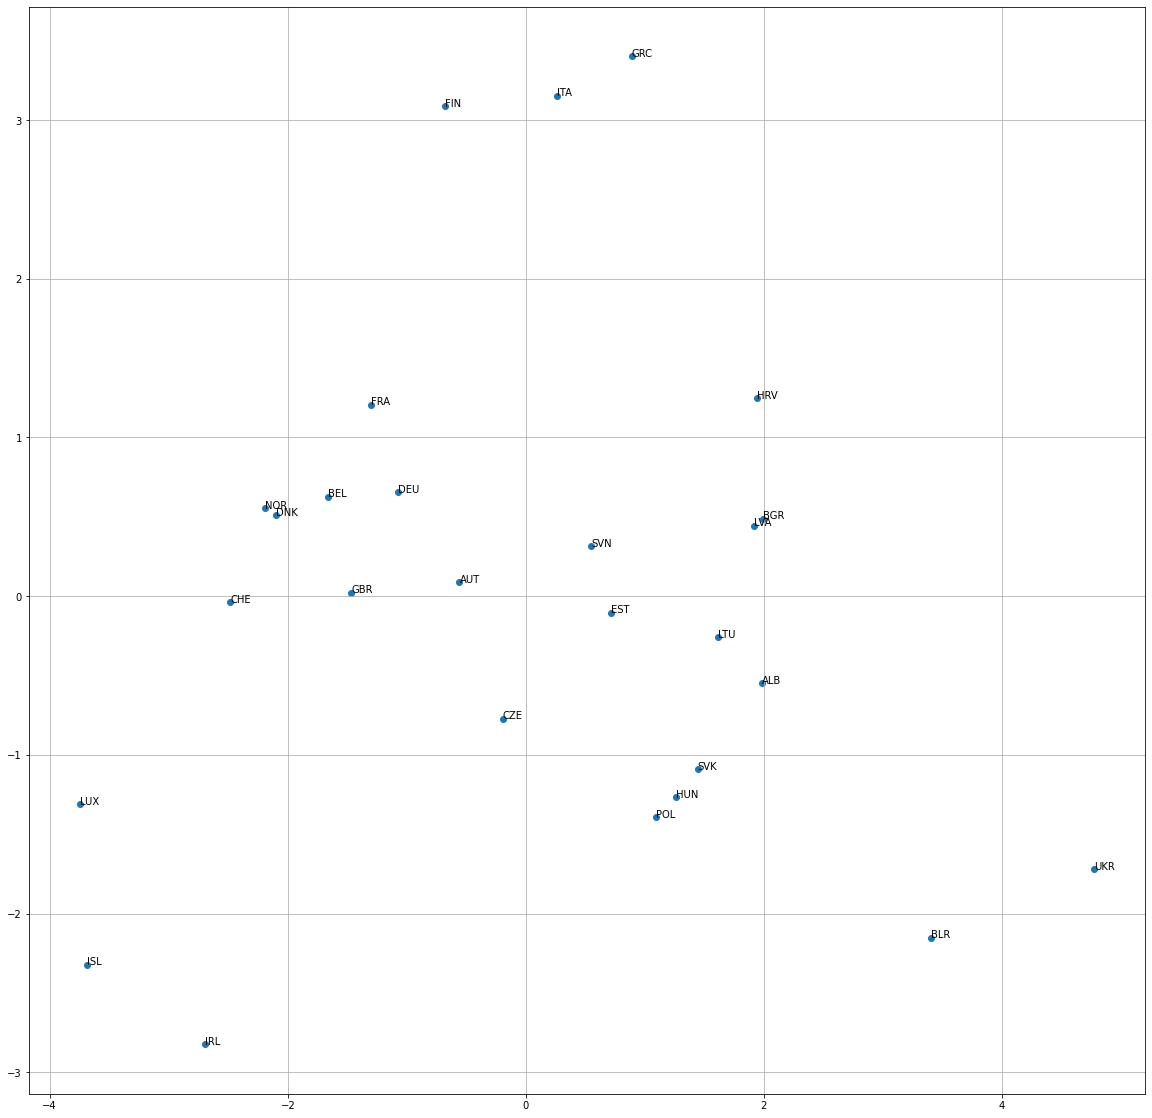

In [12]:

plt.figure(figsize=(20,20))
transformed = pd.DataFrame(transformed)
transformed.columns=['partial_1', 'partial_2']
transformed.index = df.index
plt.scatter(transformed.partial_1, transformed.partial_2)

for i, index in enumerate(transformed.index):
    plt.annotate(index, (transformed.loc[index,'partial_1'], transformed.loc[index,'partial_2']))

plt.grid()

## Z powyższego wykresu widzimy ze wyodrębnia się 4 lub 5 klastrów.

## Poniżej prezentuje projekcje 3 czynników w przestrzeni trójwymiarowej

In [13]:
import plotly.express as px

pca = PCA(n_components=3)
transformed = pca.fit_transform(df_scaled)
transformed = pd.DataFrame(transformed)
transformed.index = df.index
transformed = transformed.reset_index()


transformed.columns=['country', 'partial_1', 'partial_2', 'partial_3']

fig = px.scatter_3d(transformed, x='partial_1', y='partial_2', z='partial_3',
              color='country')
fig.update_layout(width=1000, height=800)              
fig.show()

# Analiza skupień

In [14]:
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage, ward, fcluster

fun = lambda x: linkage(x, "ward")
fun = lambda x: ward(x)

fig = ff.create_dendrogram(df, labels=df.index, linkagefun=fun)
fig.update_layout(width=1000, height=800)
fig.show()

In [15]:
z = ward(df)
clusters = fcluster(z, 41000, criterion='distance')

df_scaled = pd.DataFrame(df_scaled, index =df.index)
df_scaled['clusters'] =  clusters
# df_scaled

## Średnie wartości ustandaryzowanych cech w klastrach

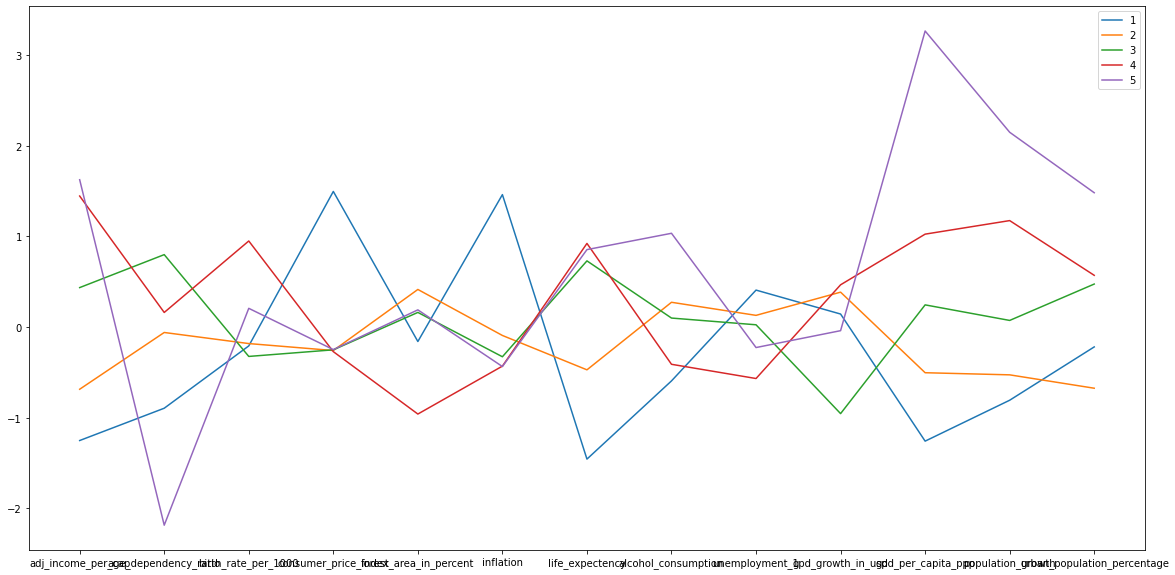

In [16]:
agg = df_scaled.groupby(['clusters']).mean()

plt.figure(figsize=(20,10))
for index in agg.index:
    row = agg.loc[index, :]
    plt.plot(row, label=index)
    plt.xticks(range(13), labels=list(df.columns))

plt.legend()

In [17]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

shape = world[world['name'] == 'France']['geometry'].all()

fr_df = pd.Series(['France', 'France'], name='country')
fr_df = geopandas.GeoDataFrame(fr_df, geometry=[shape[1], shape[2]])
fr_df = fr_df.dissolve(by='country')
world.at[world['name'] == 'France', 'geometry'] = fr_df['geometry'].values   

europe = world[(world.continent=='Europe') & (~world.iso_a3.isin(['RUS', ]))]
europe.loc[europe.name=="Norway", 'iso_a3'] = 'NOR'
europe.loc[europe.name=="France", 'iso_a3'] = 'FRA'
df_scaled = df_scaled.reset_index()

## Mapa prezentująca rozmieszczenie klastrów

No handles with labels found to put in legend.


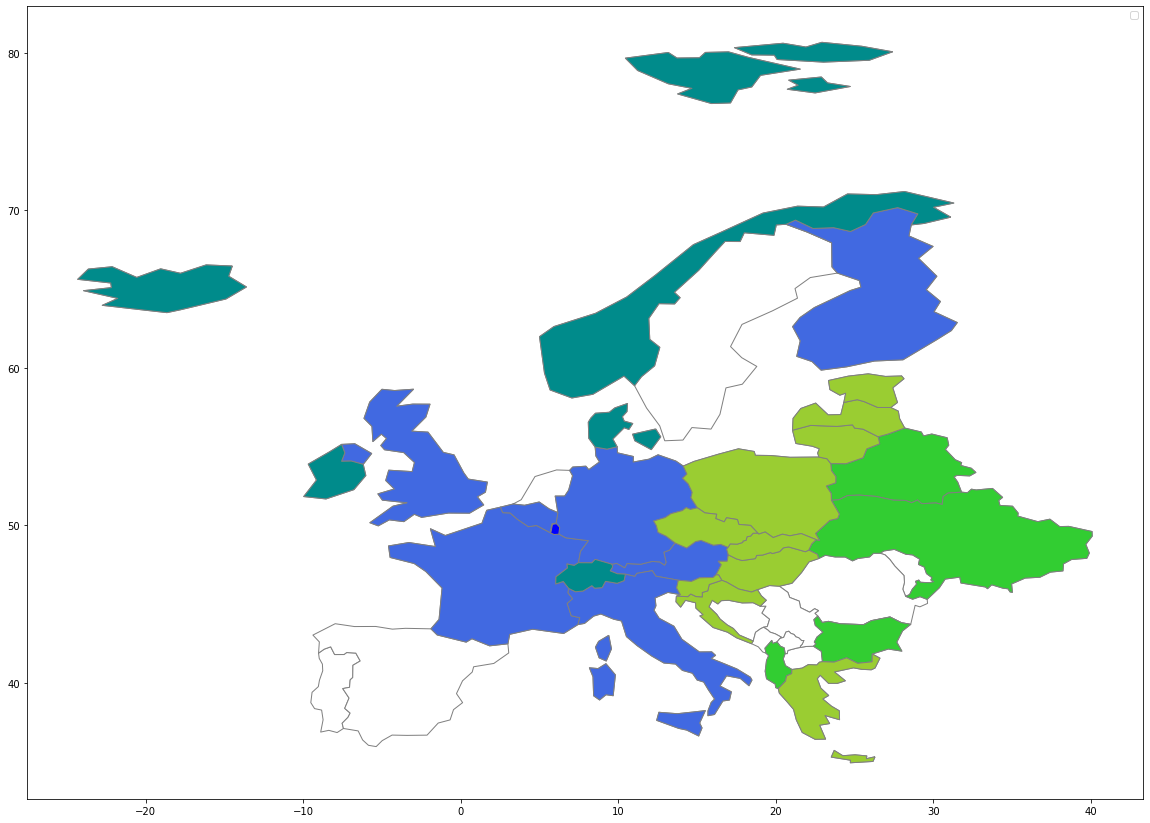

In [18]:
ax = europe.plot(figsize=(20,20), color='white', linestyle='-', edgecolor='gray')

colors = ['limegreen', 'yellowgreen', 'royalblue', 'darkcyan', 'blue']

for i in df_scaled.clusters.unique():
    tmp = df_scaled[df_scaled.clusters==i].country_code
    europe[europe.iso_a3.isin(tmp)].plot(figsize=(20,20), color=colors[i-1], edgecolor='gray', ax=ax, legend=True)

_ = plt.legend()


# Porządkowanie liniowe

- adj_income_per_cap S
- age_dependency_ratio D
- birth_rate_per_1000 S
- consumer_price_index D
- forest_area_in_percent S
- inflation D
- life_expectency S
- alcohol_consumption D
- unemployment_1 D
- gpd_growth_in_usd S
- gpd_per_capita_ppp S
- population_growth S
- urban_population_percentage D

In [19]:
df

,adj_income_per_cap,age_dependency_ratio,birth_rate_per_1000,consumer_price_index,forest_area_in_percent,inflation,life_expectency,alcohol_consumption,unemployment_1,gpd_growth_in_usd,gpd_per_capita_ppp,population_growth,urban_population_percentage
country_code,,,,,,,,,,,,,
ALB,4326.330596,45.810037,11.78,117.392740,28.791971,2.028060,78.458000,7.17,12.30,4.071301,13546.481686,-0.246732,60.319
AUT,41712.201266,49.923940,9.70,116.277887,47.163960,1.998380,81.692683,11.96,4.85,2.580121,57050.351355,0.487072,58.297
BEL,39098.085540,55.870466,10.40,115.451626,22.764201,2.053165,81.595122,11.08,5.95,1.787920,52668.172441,0.455185,98.001
BGR,7747.240112,55.321416,8.90,110.974059,35.620855,2.814545,74.963415,12.65,5.21,3.092448,22911.298354,-0.722080,75.008
BLR,4975.785814,46.436664,9.90,481.390314,43.051532,4.872302,74.175610,11.45,4.76,3.149198,19338.666438,-0.155570,78.595
CHE,64906.688967,50.453260,10.30,99.186961,31.942227,0.936335,83.753659,11.53,4.71,2.916905,68709.444183,0.736634,73.797
CZE,17411.918294,53.863862,10.70,113.250314,34.630440,2.149495,79.029268,14.45,2.24,3.198656,41127.254047,0.334427,73.792
DEU,40263.990413,54.042836,9.50,111.246631,32.683611,1.732168,80.892683,12.91,3.38,1.086025,54954.846748,0.300527,77.312
DNK,52447.844271,56.914957,10.60,109.517007,15.664000,0.813609,80.953659,10.26,5.13,1.989537,57462.776012,0.495839,87.874


In [20]:
wsp_zmienn = df.std() / df.mean()
wsp_zmienn = wsp_zmienn[wsp_zmienn > 0.1]

#usuwamy cechy z zbyt małą zmiennością
df = df[wsp_zmienn.index]

In [21]:
wsp_zmienn = df.std() / df.mean()
sum_wsp_zmienn = wsp_zmienn.sum()

weights = wsp_zmienn * sum_wsp_zmienn
df_scaled = (df - df.mean()) / df.std()

wzorzec = df_scaled.max()
antywzorzec = df_scaled.min()

is_s = np.array([True, True, False, True, False, False, False, True, True, True, False])

wzorzec_2 = np.where(is_s, wzorzec, 0) + np.where(~is_s, antywzorzec, 0)
d0 = np.sqrt(((wzorzec - antywzorzec)**2).sum())
y = (df_scaled - wzorzec_2)**2
d0s = y.sum(axis=1)**(1/2)
mi = 1 - (d0s / d0)
mi = mi.sort_values(ascending=False)


<AxesSubplot:ylabel='country_code'>

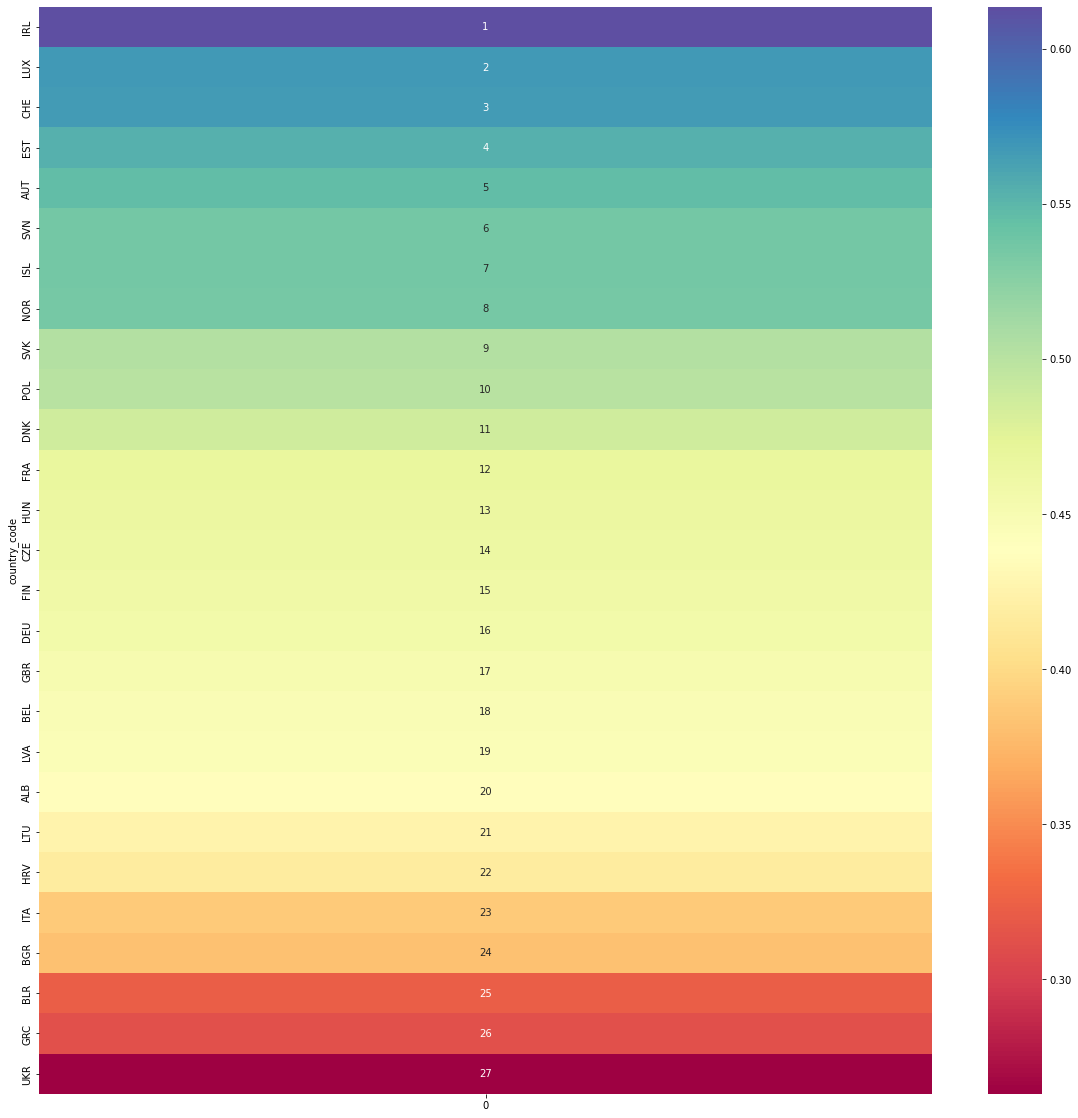

In [22]:
plt.figure(figsize=(20,20))

sns.heatmap(pd.DataFrame(mi), cmap='Spectral', annot=np.array(range(1, 28)).reshape(27,1))

## Na podstawie wyników metody Hellwiga uzywając wspórzędnej wzroca stwiedzamy że najszczęśliwsi ludzie żyją w Irlandii, Luxemburgu oraz Szwajcarii. Najmniejszcześliwi ludzie żyją w Ukrainie, Grecji oraz Bułgarii